In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2245,ham,How did you find out in a way that didn't incl...,NaN,NaN,NaN
4434,spam,Don't b floppy... b snappy & happy! Only gay c...,NaN,NaN,NaN
2747,ham,Ya had just now.onion roast.,NaN,NaN,NaN
729,ham,Dunno y u ask me.,NaN,NaN,NaN
840,ham,I luv u soo much u donåÕt understand how speci...,NaN,NaN,NaN
3052,ham,Pls send me the correct name da.,NaN,NaN,NaN
1423,ham,Lol great now im getting hungry.,NaN,NaN,NaN
1207,ham,I need you to be in my strong arms...,NaN,NaN,NaN
2547,spam,"Text82228>> Get more ringtones, logos and game...",NaN,NaN,NaN
2260,spam,SplashMobile: Choose from 1000s of gr8 tones e...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1 Data cleaning
#2 EDA
#3 Text Pre-processing
#4 Model Building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3' , 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
445,ham,"Sorry, my battery died, I can come by but I'm ..."
4355,ham,Great. So should i send you my account number.
4546,ham,Hey mate. Spoke to the mag people. We‰Û÷re on....
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
1655,ham,At 7 we will go ok na.


In [9]:
#renaming the columns
df.rename(columns={'v1' : 'Target' , 'v2' : 'text'} , inplace = True)
df.sample(10)

,Target,text
549,ham,Ok give me 5 minutes I think I see her. BTW yo...
459,ham,Going thru a very different feeling.wavering d...
4381,ham,yeah sure thing mate haunt got all my stuff so...
3556,ham,I had it already..sabarish asked me to go..
595,ham,I am great! How are you?
3683,ham,Dad says hurry the hell up
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo..."
1219,ham,True. It is passable. And if you get a high sc...
4218,ham,Anything lor if they all go then i go lor...
3919,spam,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

Target    0
text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

414

In [15]:
#drop duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5158, 2)

# 2. EDA

In [18]:
df['Target'].value_counts()

Target
0    4516
1     642
Name: count, dtype: int64

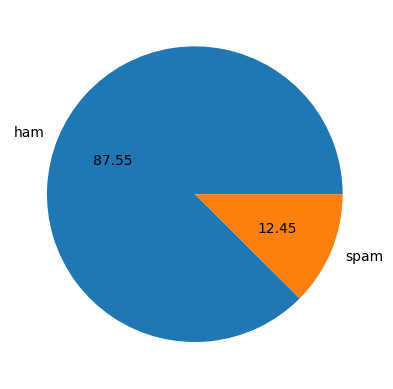

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham' , 'spam'],autopct="%0.2f")
plt.show()

In [20]:
#Data is imbalanced

In [21]:
import nltk

In [22]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [23]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

2024-04-19 02:41:33.362 Python[37341:1406980] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhavyakhandelwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5158.000000,5158.000000,5158.000000
mean,78.806708,18.430399,1.962195
std,58.187284,13.326907,1.445515
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.449734,17.123782,1.820195
std,56.352902,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.00000,642.000000,642.000000
mean,137.59190,27.621495,2.961059
std,30.29638,7.048863,1.477880
min,13.00000,2.000000,1.000000
25%,131.25000,25.000000,2.000000
50%,148.00000,29.000000,3.000000
75%,157.00000,32.000000,4.000000
max,224.00000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

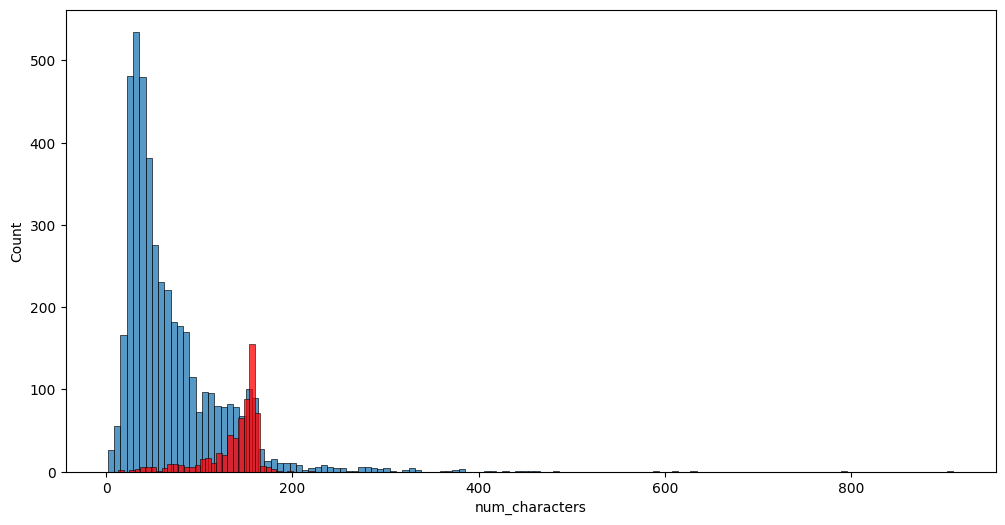

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

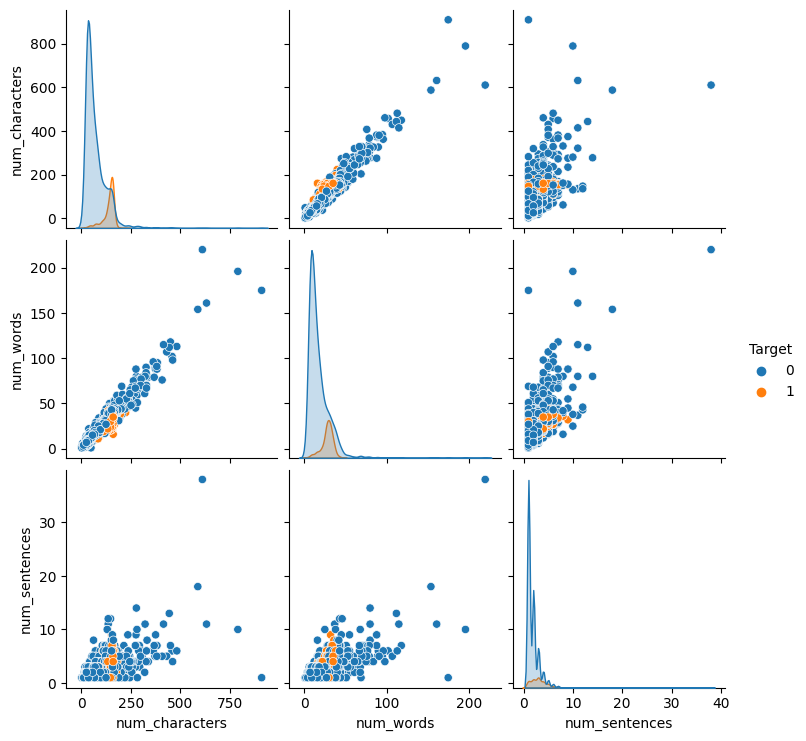

In [36]:
sns.pairplot(df,hue='Target')

# 3. Data Preprocessing
. Lower Case
. Tokenization
. Removing special characters
. Removing stop words and punctuation
. Stemming

In [43]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavyakhandelwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
from nltk.corpus import stopwords


In [55]:
import string

In [56]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [58]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [59]:
df['transformed_text'] = df['text'].apply(transform_text)

In [60]:
 df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
import sys
print(sys.executable)

/Library/Frameworks/Python.framework/Versions/3.11/bin/python3.11


In [70]:
%pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [71]:
from wordcloud import WordCloud
wc = wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [72]:
wc.generate(df[df['Target']== 1]['transformed_text'].str.cat(sep=" "))

In [125]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [126]:
len(spam_corpus)

9765

# 4. Model Building


In [174]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [175]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [176]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [177]:
y = df['Target'].values

In [179]:
X.shape

(5158, 3000)

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [182]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [183]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [184]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.872093023255814
[[785 118]
 [ 14 115]]
0.49356223175965663


In [194]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9874031007751938
[[902   1]
 [ 12 117]]
0.9915254237288136


In [195]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806201550387597
[[901   2]
 [ 18 111]]
0.9823008849557522


In [187]:
%pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn. ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [197]:
svc = SVC (kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB ( )
dtc = DecisionTreeClassifier (max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier (n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier (n_estimators=50, random_state=2)
etc = ExtraTreesClassifier (n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier (n_estimators=50, random_state=2)
xgb = XGBClassifier (n_estimators=50, random_state=2)

In [198]:
clfs = {
'SVC' : SVC,
'KN': knc,
'NB': mnb,
'DT': dtc,
'LR': lrc,
'RF': rfc,
'AdaBoost': abc,
'BgC': bc,
'ETC': etc,
'GBDT': gbdt,
'xgb':xgb
}

In [199]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score (y_test,y_pred)
    precision = precision_score (y_test,y_pred)
    return accuracy, precision

In [200]:
train_classifier (svc,X_train,y_train, X_test,y_test)


(0.9660852713178295, 0.9122807017543859)

In [202]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming you have your data split into X_train, X_test, y_train, and y_test

# Create an instance of MultinomialNB
mnb = MultinomialNB()

# Fit (train) the classifier on the training data
mnb.fit(X_train, y_train)

# Now that the classifier is trained, you can make predictions
y_pred2 = mnb.predict(X_test)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("Precision Score:", precision_score(y_test, y_pred2))


Accuracy: 0.9874031007751938
Confusion Matrix:
[[902   1]
 [ 12 117]]
Precision Score: 0.9915254237288136


In [203]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))